**1. Import necessary Libraries & Dataset**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset.csv')

#Printing the info for the dataset

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            500 non-null    int64  
 1   gender                 500 non-null    object 
 2   age                    500 non-null    int64  
 3   marital_status         500 non-null    object 
 4   dependents             500 non-null    int64  
 5   contract_type          500 non-null    object 
 6   internet_service       500 non-null    object 
 7   phone_service          500 non-null    object 
 8   multiple_lines         500 non-null    object 
 9   online_security        500 non-null    object 
 10  online_backup          500 non-null    object 
 11  device_protection      500 non-null    object 
 12  tech_support           500 non-null    object 
 13  streaming_tv           500 non-null    object 
 14  streaming_movies       500 non-null    object 
 15  monthl

**2. Data Visualization & Exploration**

**2a. Printing first 5 rows of dataset**

In [4]:
# Printing the first 5 rows of the dataset

df.head(5)

,customer_id,gender,age,marital_status,dependents,contract_type,internet_service,phone_service,multiple_lines,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,monthly_charges,total_charges,churn_status,call_duration_minutes,latitude,longitude
0,3850,Male,42,Married,3,Monthly,Fiber Optic,No,No,Yes,...,No,Yes,Yes,Yes,41.40,595.21,No,1062,-49.780269,-13.803970
1,4696,Female,76,Single,1,Yearly,DSL,No,Yes,Yes,...,No,Yes,Yes,No,46.20,940.05,No,901,56.553157,113.992914
2,5695,Female,39,Married,2,Monthly,Fiber Optic,Yes,No,Yes,...,No,No,Yes,No,43.05,919.62,No,928,80.762088,-27.906437
3,8712,Female,74,Single,3,Monthly,DSL,No,No,No,...,Yes,No,No,Yes,23.01,538.68,Yes,479,87.832819,86.922690
4,10506,Male,30,Married,3,Yearly,DSL,No,Yes,No,...,Yes,No,No,No,38.19,875.93,No,650,-88.373695,-29.320198


**2b. Class Imbalance check on Target Variable**


Features in the dataset: 
Index(['customer_id', 'gender', 'age', 'marital_status', 'dependents',
       'contract_type', 'internet_service', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'monthly_charges', 'total_charges',
       'call_duration_minutes', 'latitude', 'longitude'],
      dtype='object')
Target Variable: 'churn_status'


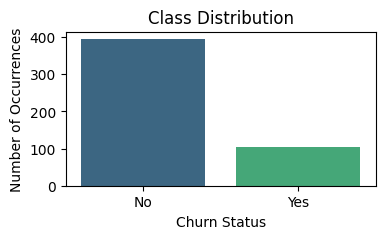

Class Imbalance Information: 
churn_status
No     395
Yes    105
Name: count, dtype: int64


In [5]:
# Extracting features and target

target = df.columns[17] # The 17th column ('churn_status') is the target
features = df.drop(columns=[target]).columns # The remaining 20 columns except the target variable (at 17th) are the features

# Printing features
print(f"Features in the dataset: \n{features}")

# Printing target
print(f"Target Variable: '{target}'")

class_counts = df[target].value_counts()

class_counts = df[target].value_counts()

# Plotting the class distribution
plt.figure(figsize=(4, 2))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Class Distribution')
plt.xlabel('Churn Status')
plt.ylabel('Number of Occurrences')
plt.show()

# Printing class imbalance information
print(f"Class Imbalance Information: \n{class_counts}")

**Comments on Class Imbalance:
The given dataset has very high class imbalance with almost 79% (395 out of 500) of majority class having Churn Status as 'NO' v/s only around 21% (105 out of 500) of minority class with Churn Status as 'YES'. Using the above dataset directly to train on any ML algorithms like Decision Tree Classfier will lead to "High Bias" to the majority class.
To avoid this bias, pre-processing techniques like Resampling will need to be undertaken during the pre-processing stage before training the model.
Eg: For Oversampling - SMOTE, ADASYN, IMBLEARN.RandomOverSampler etc and for undersampling - IMBLEARN.RandomUnderSampler, NearMiss, EditedNearestNeighbours etc.**

**2c. Data Visualization**

Numerical Features: ['customer_id', 'age', 'dependents', 'monthly_charges', 'total_charges', 'call_duration_minutes', 'latitude', 'longitude']
Categorical Features: ['gender', 'marital_status', 'contract_type', 'internet_service', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'churn_status']


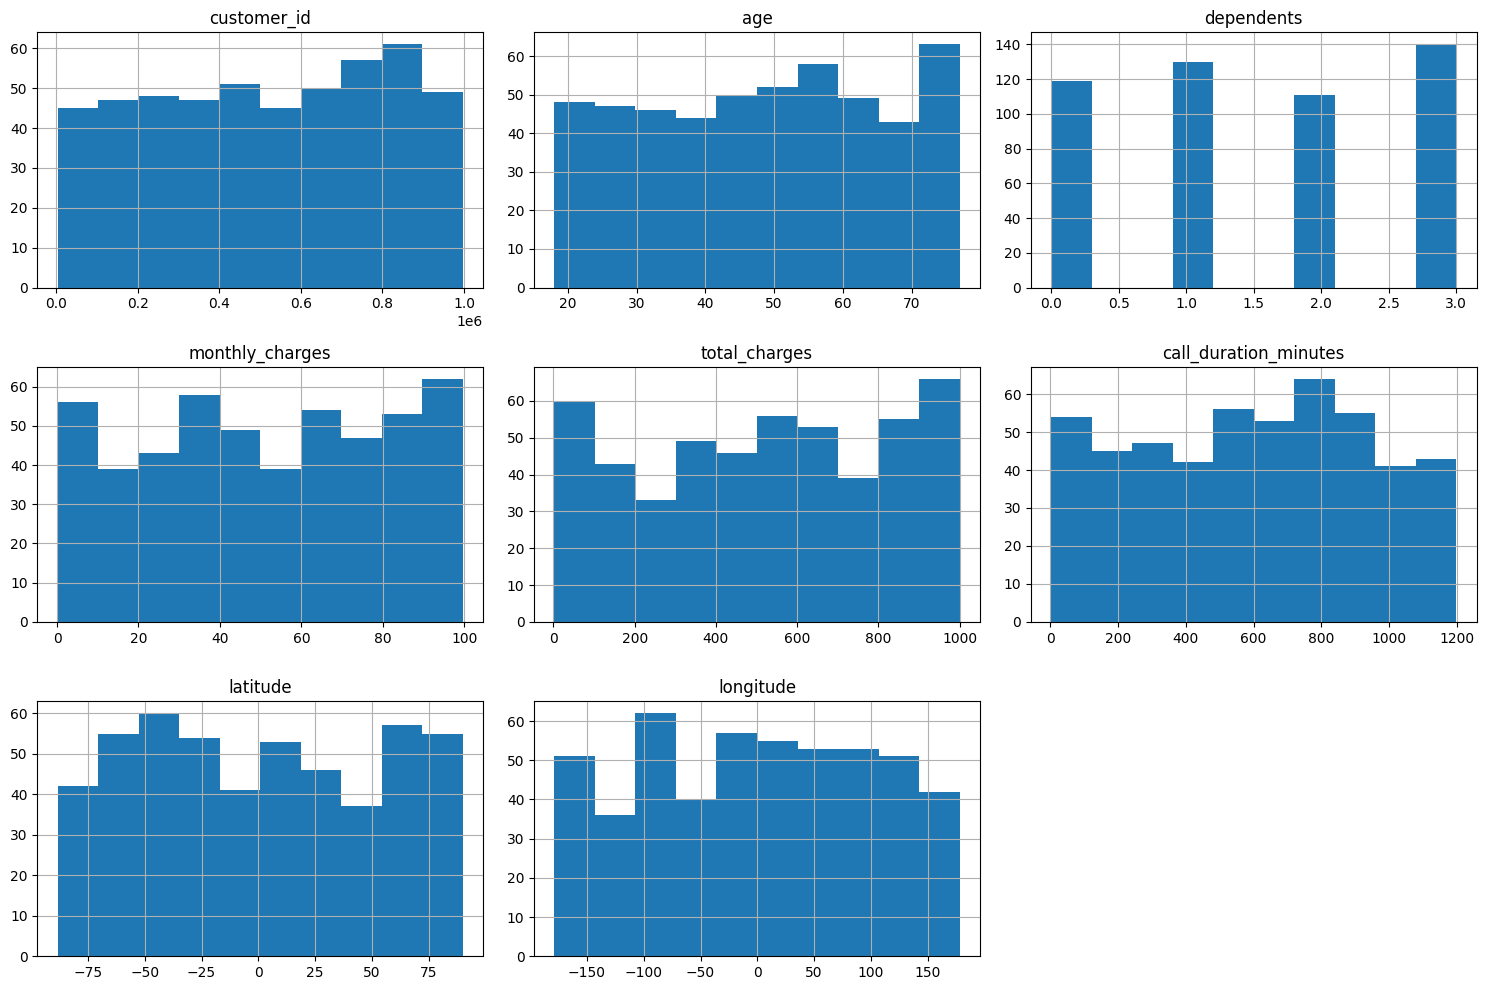

In [6]:
# Data visualization to get insights about dataset

# Numerical & Categorical Features
numerical_features = df.select_dtypes(include=['float64', 'int64', 'category']).columns.tolist()
print(f"Numerical Features: {numerical_features}")
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical Features: {categorical_features}")

# Plot histograms for numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


# # Box plot for numerical features
# plt.figure(figsize=(12, 4))
# sns.boxplot(data=df)
# plt.xticks(rotation=45)
# plt.show()




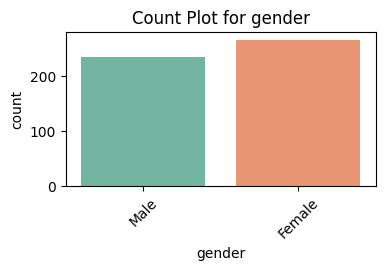

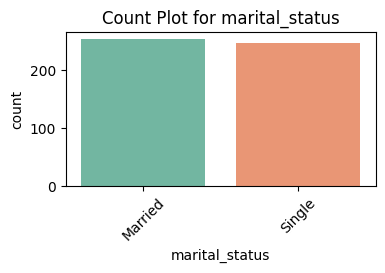

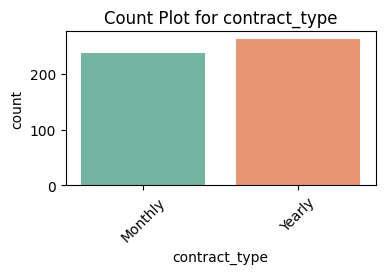

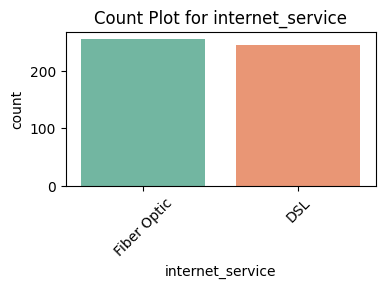

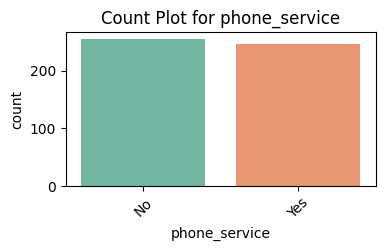

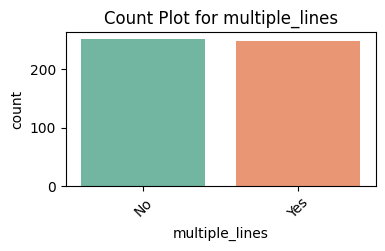

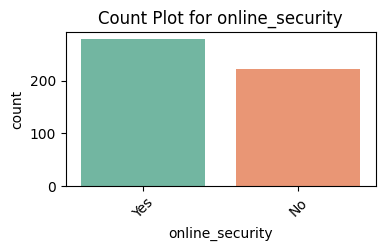

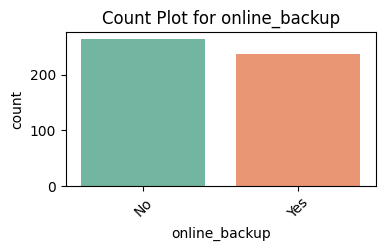

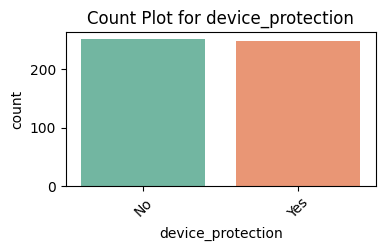

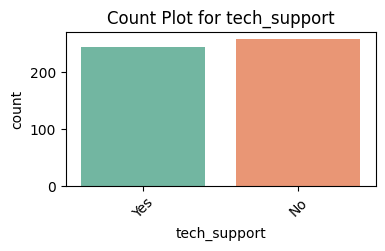

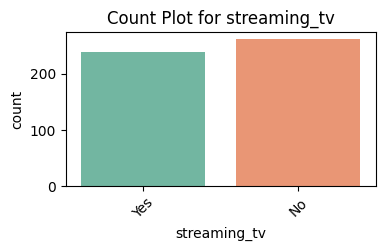

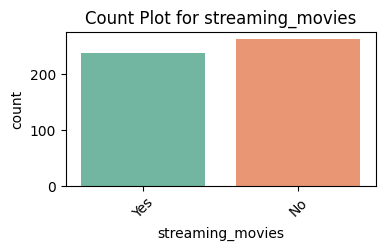

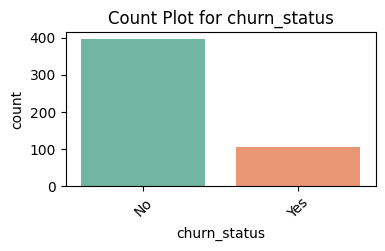

In [7]:
# Count plot for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=feature, palette='Set2')
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=45)
    plt.show()

**2d. Correlation Analysis & Visualization**

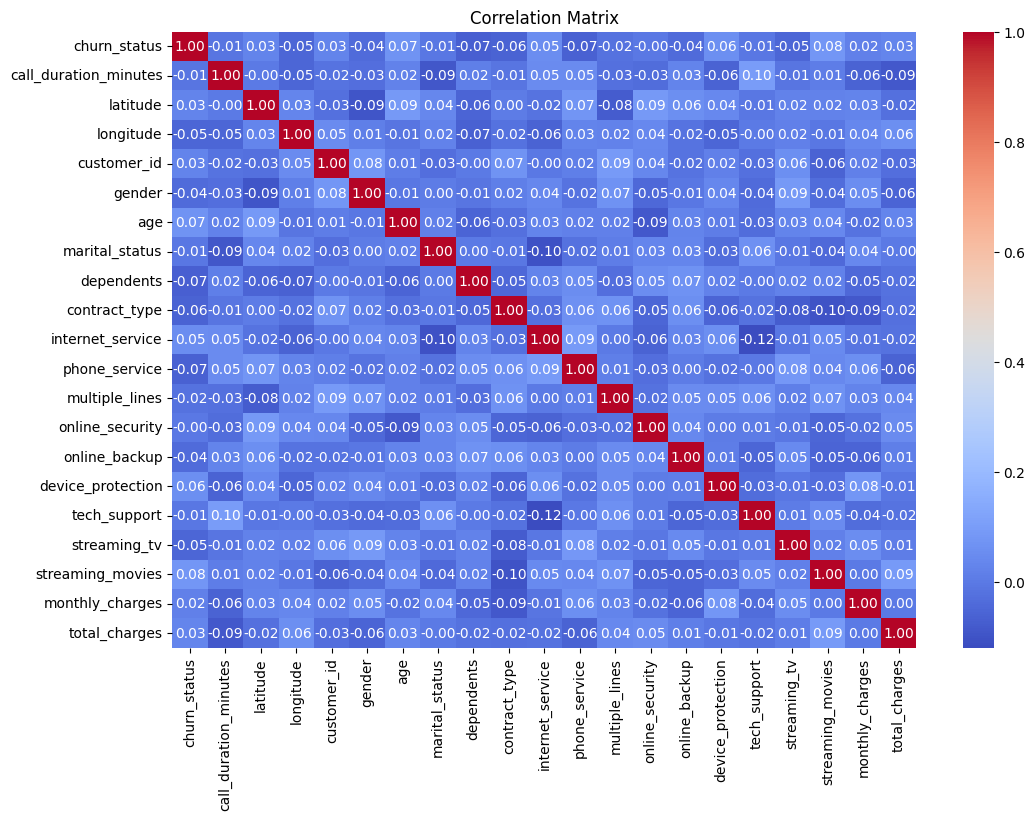

In [8]:
# Correlation analysis

# Before performing correlation analysis, Categorical features needs to be converted to Numerical values. For Example: Label Encoding
label_encoder = LabelEncoder()

df_encoded = df.copy()

# Change the position of the 17th column (which is target variable) to be the first column
cols = df_encoded.columns.tolist()
cols = cols[-4:] + cols[:-4]
df_encoded = df_encoded[cols]

# Apply LabelEncoder to each categorical feature
for column in df_encoded.select_dtypes(include=['object', 'category']).columns.tolist():
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Perform correlation analysis and reversing the matrix so that the Target Class becomes the first row elements
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()





**Comments: Correlational analysis impact on feature selection.
The above Correlation Matrix Plot shows that the "Churn Status" has zero correlation with the "Online Security" feature and could be ignored in the pre-processing & feature selection stages.**

**Strong Positive Correlation: "Streaming Movies" and "Age" features has strong correlation of 0.8 and 0.7 respectively when it comes to Churned/Retained customers.**

**Strong Negative Correlation: "Dependents" and "Phone Service" features has strong negative correlation of -0.7 when it comes to Churned/Retained customers
**
**Features with same correlation could provide similar information. In feature selection, we could choose to keep one of them and exclude the other to avoid redundancy.**

**3. Data Pre-processing and Cleaning**


**3a. Data Pre-processing**

Are there any null values in the Dataframe?  False
Are there any missing values in the Dataframe?  0


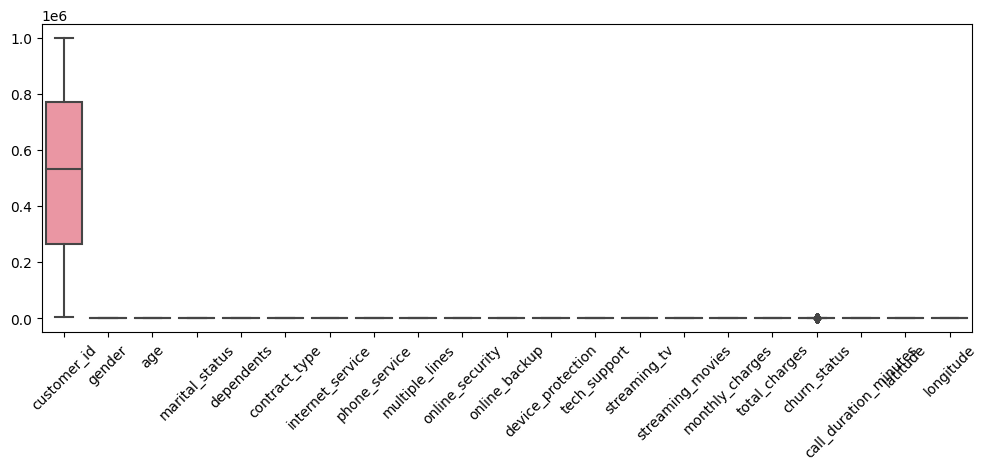

In [9]:
# Appropriate pre-processing checks of the data

# Check for any nulls across the dataset - across rows and columns
print("Are there any null values in the Dataframe? ", df.isnull().any().any())

# Check for missing values in the dataset - across rows and columns
print("Are there any missing values in the Dataframe? ", df.isna().sum().sum())
# Apply LabelEncoder to each categorical feature to convert into numerical values
df_label_encoder = LabelEncoder()
for feature in df.select_dtypes(include=['object', 'category']).columns.tolist():
    df[feature] = df_label_encoder.fit_transform(df[feature])
    
# Outlier and Skewness Check by Plotting Box plot for all converted numerical features
plt.figure(figsize=(12, 4))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()



**Comments on Pre-processing**
**Based on the above pre-processing checks, the dataset does not contain any NULL or Missing Values.**

**However, not all features are numerical values and thus was converted to numbers using suitable encoding like "LabelEncoding".**

**Next, skewness in the dataset needs to be mitigated using Feature Scaling like Normalization or Standarization.**

**3b. Feature Engineering**

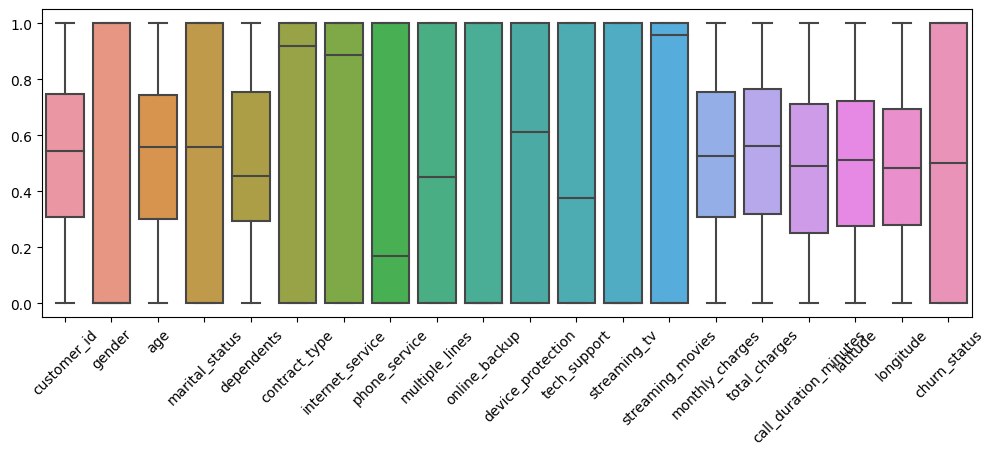

In [10]:
# Feature Engineering/Transformation techniques

# Feature Selection 
df_selected = df.copy()
df_selected = df_selected.drop('online_security', axis=1) # Remove the column "online_security" which has no correlation to target variable and thus removed

cols = df_selected.columns.tolist()
cols = cols[:-4] + cols[-4:] # Change the position of the 17th column (which is target variable - 'churn_status') to be the last column
df_selected = df_selected[cols]


# Feature Transformation
# Normalization for removing skewness
min_max_scaler = MinMaxScaler()
df_processed = df_selected.copy()
features_selected = df_selected.columns.tolist()
df_processed[features_selected] = min_max_scaler.fit_transform(df_processed[features_selected])

# Splitting the dataset into features (X) and target variable (y)
features_final = df_processed.columns[:-1]  # The last column ('churn_status') is the target
target_final = df_processed.columns[-1]
X_processed = df_processed.drop(columns=[target])
y_processed = df_processed[target]

# Resampling using SMOTE to avoid Class Imbalance for the target variable - 'churn_status'
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X_processed, y_processed)

# Balanced Box plot for selected features and target
plt.figure(figsize=(12, 4))
sns.boxplot(data=pd.concat([X, y], axis=1))
plt.xticks(rotation=45)
plt.show()

**Comments on Feature Engineering**
**Feature Selection is used to remove columns like 'online_securityt'whichn showed 0 correlation to Target variable and thus Removed.**


**Normalization technique to scale down the values to range of 0 to 1, using MinMaxScaler which removed skewness in data.**


**Class imbalance is solved by oversampling/resampling of Minority class using SMOTE**

**4. Model Building**


**4a. Split the dataset into Training and Test sets**

In [11]:
# Split the dataset to Train and Test
print("\033[1m> X/y = 80:20 split. \033[0m")

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of train and test sets at 80/20 split
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

> X/y = 80:20 split. 
Shape of X_train: (632, 19)
Shape of y_train: (632,)
Shape of X_test: (158, 19)
Shape of y_test: (158,)


**4b. Decision Tree Model**

In [12]:
# Building model using Decision Tree

# Instantiate the Decision Tree classifier
decision_tree_classifier_for_80_20_split = DecisionTreeClassifier()

# Train the classifier for different splits
decision_tree_classifier_for_80_20_split.fit(X_train, y_train)

# Performance Metrics of Decision Tree Model
print("\033[1m> Performance Metrics of Decision Tree Model \n\033[0m")

# Predict the target variable for the testing set at 80:20 split
y_pred_decision_tree = decision_tree_classifier_for_80_20_split.predict(X_test)

# Evaluate the model at 80:20 split
print("Accuracy for X/y at 80:20 split:", accuracy_score(y_test, y_pred_decision_tree))

# Classification report
print(classification_report(y_test, y_pred_decision_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_decision_tree))

> Performance Metrics of Decision Tree Model 

Accuracy for X/y at 80:20 split: 0.7911392405063291
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80        79
         1.0       0.81      0.76      0.78        79

    accuracy                           0.79       158
   macro avg       0.79      0.79      0.79       158
weighted avg       0.79      0.79      0.79       158

Confusion Matrix:
 [[65 14]
 [19 60]]


**Comments: Performance Metrics shows an accuracy of around 80% for the Decision Tree Model.**


**Improving the model performance can be done using HyperParameter Tuning. Alternatively using ensemble learning, DecisionTree can be converted to RandomForest algorithms which could provide better performance metrics.**